In [48]:
from glob import glob
import re
import os

import numpy as np
from scipy import stats

from astropy import units as u
from astropy.coordinates import Distance, SkyCoord
from astropy.table import Table

In [34]:
%matplotlib inline
from matplotlib import style, pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['axes.prop_cycle'] = style.library['seaborn-deep']['axes.prop_cycle']
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.titlesize'] =  plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] =  plt.rcParams['ytick.labelsize'] = 14

In [35]:
# widens the nb to mostly fill the screen rather than being fixed-width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Load Data

In [5]:
meanstack_fns = {'draco': ('draco_mean_db_jegpeek.fits.gz', 'stack_draco_jegpeek.fits.gz')}
meanstack_fns['aquarius'] = ('Aquarius_mn_db_jegpeek.fit.gz', 'Aquarius_st_db_jegpeek.fit.gz')
meanstack_fns['leoiv'] = ('LeoIV_mn_db_jegpeek.fit.gz', None)
meanstack_fns['leot'] = ('LeoT_mn_db_jegpeek.fit.gz', None)
meanstack_fns['piscA'] = ('PiscesA_mn_db_jegpeek.fit.gz', None)
meanstack_fns['piscB'] = ('PiscesB_mn_db_jegpeek.fit.gz', None)
for i in range(len(glob('vdev_*_st_db_jegpeek.fit.gz'))):
    mnfn = 'vdev_{:02.0f}_mn_db_jegpeek.fit.gz'.format(i)
    stfn = 'vdev_{:02.0f}_st_db_jegpeek.fit.gz'.format(i)
    meanstack_fns['vdev_{:02.0f}'.format(i)] = (mnfn, stfn)

In [7]:
meanstack_tabs = {}
for nm, (mean_fn, stack_fn) in meanstack_fns.items():
    mean_tab = Table.read(mean_fn) if mean_fn is not None else None
    stack_tab = Table.read(stack_fn) if stack_fn is not None else None
    meanstack_tabs[nm] = (mean_tab, stack_tab)

In [8]:
# informational, to know the distance modulii at various distances relative to draco

draco_d = Distance(80, u.kpc)
Distance([200, 400, 1500], u.kpc).distmod - draco_d.distmod

<Quantity [ 1.98970004, 3.49485002, 6.36500636] mag>

In [53]:
# and ~TRGB in r to Draco, Leo IV, Leo T, aqr
Distance([76, 154, 417, 1072], u.kpc).distmod -3.5*u.mag

<Quantity [ 15.90406796, 17.4376036 , 19.60068027, 21.65097393] mag>

# Star/Galaxy Separation 

In [52]:
def stargalprob(r_kron, r_kron_err, r_ap, r_ap_err, r_psf, r_psf_err, width=.2):
    kronpsferr = np.hypot(r_kron_err, r_psf_err)
    appsferr = np.hypot(r_ap_err, r_psf_err)
    
    dkron = np.abs(r_kron-r_psf)/kronpsferr
    dap = np.abs(r_ap-r_psf)/appsferr
    dmean = (dkron + dap)/2
    
    #return stats.norm.cdf(-dap,0,1)*2
    return stats.norm.cdf(-dap*appsferr,0, width)*2

In [10]:
for mean_tab, stack_tab in meanstack_tabs.values():
    mean_tab['starprob'] = stargalprob(mean_tab['m_rMeanKronMag'], mean_tab['m_rMeanKronMagErr'],
                                       mean_tab['m_rMeanApMag'], mean_tab['m_rMeanApMagErr'],
                                       mean_tab['m_rMeanPSFMag'], mean_tab['m_rMeanPSFMagErr'], width=.1)
    if stack_tab is not None:
        stack_tab['starprob'] = stargalprob(stack_tab['st_rKronMag'], stack_tab['st_rKronMagErr'],
                                            stack_tab['st_rApMag'], stack_tab['st_rApMagErr'],
                                            stack_tab['st_rPSFMag'], stack_tab['st_rPSFMagErr'], width=.3)

/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in true_divide
/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1665: RuntimeWarning: invalid value encountered in greater
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1665: RuntimeWarning: invalid value encountered in less
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1666: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


# Randomize and show 

In [11]:
oldstate = np.random.get_state()
try:
    np.random.seed(11235)
    randomized_order = np.random.permutation(list(meanstack_tabs.keys()))
finally:
    np.random.set_state(oldstate)

/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in greater
/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


#Paste this in the cell below for final judgements *before* revealing the names:
sat_present_idx = {}
sat_present_idx[0] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[1] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[2] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[3] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[4] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[5] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[6] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[7] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[8] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[9] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[10] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[11] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[12] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[13] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[14] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[15] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[16] = 'unkno

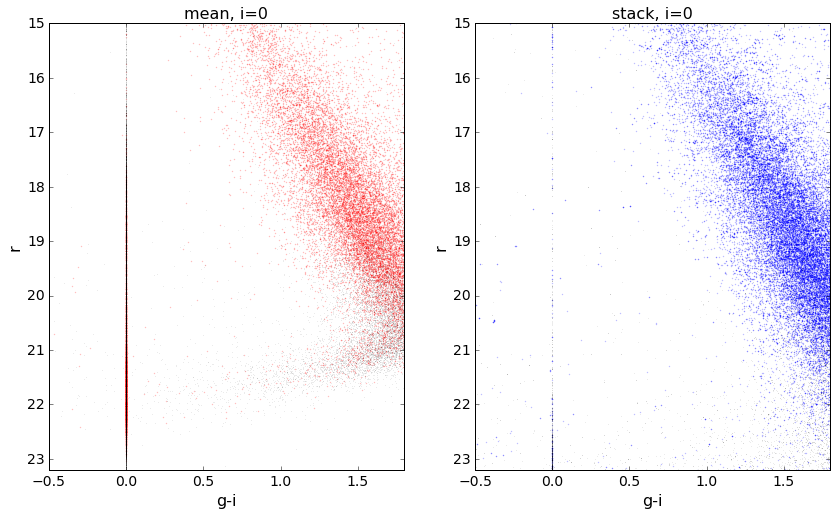

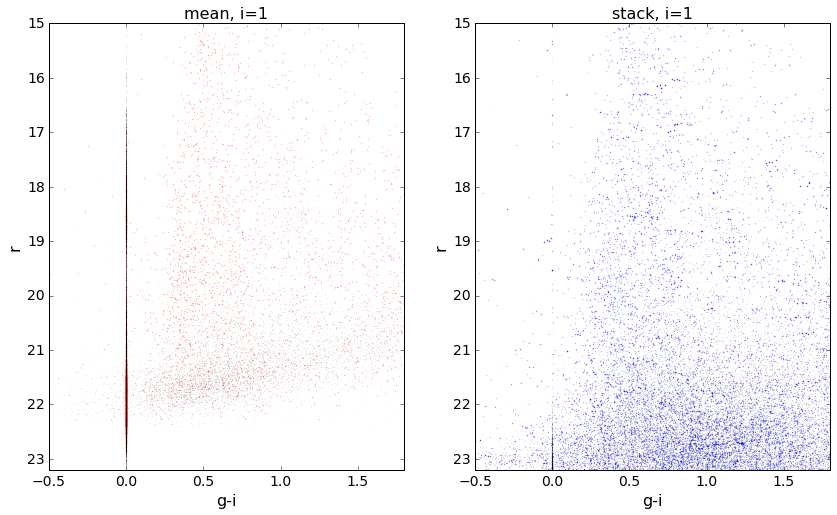

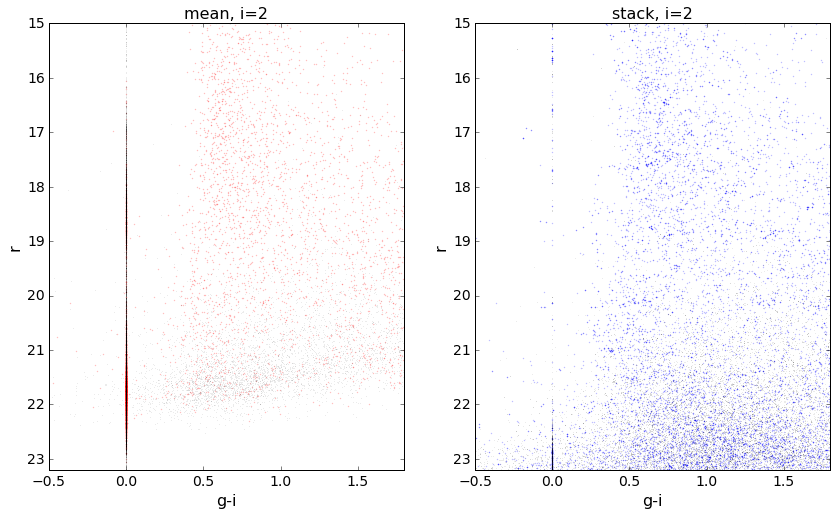

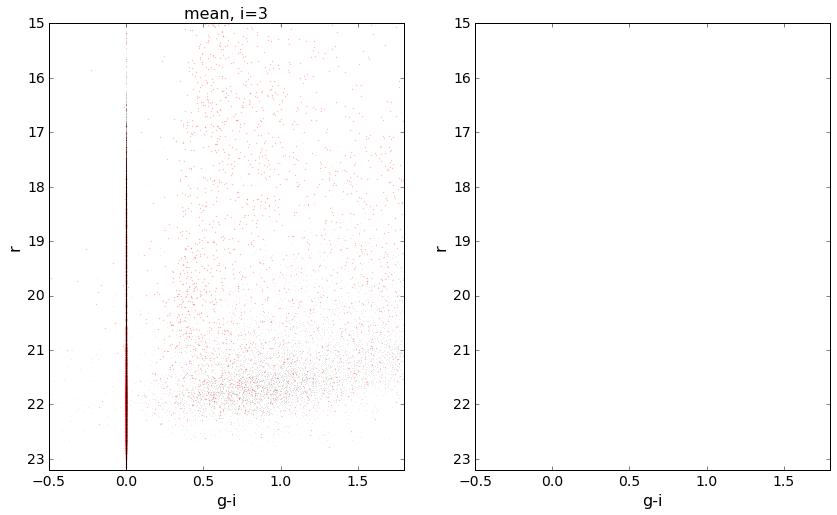

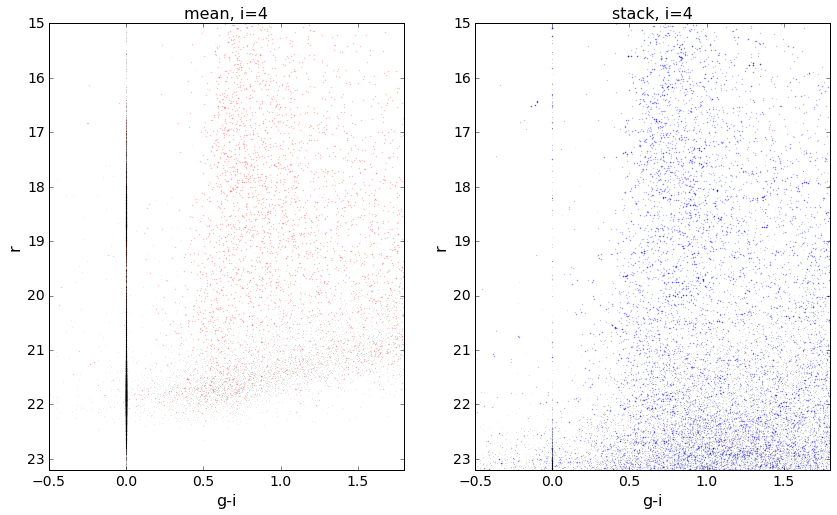

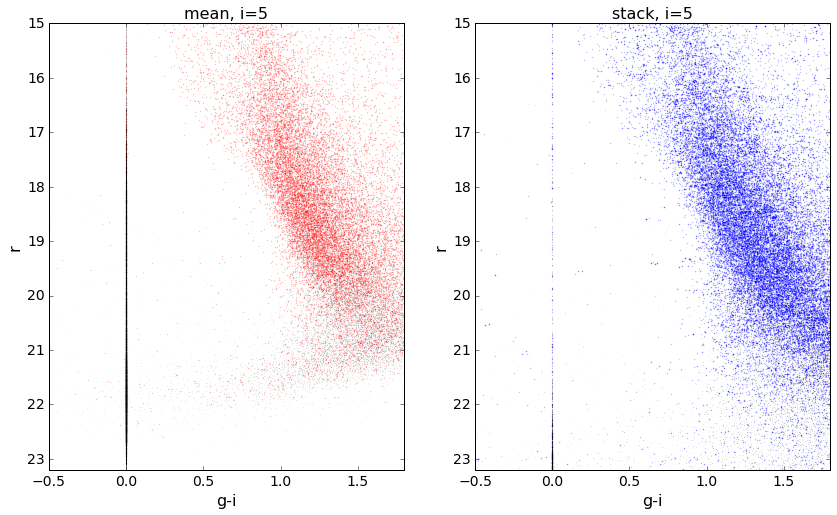

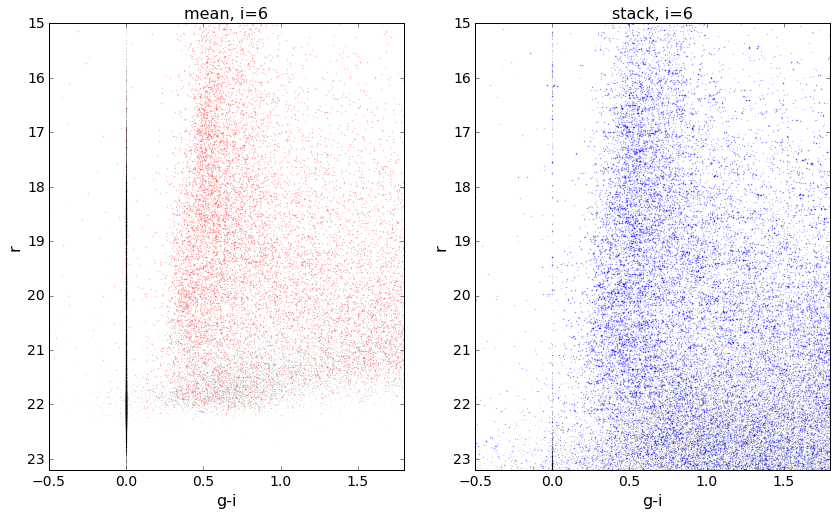

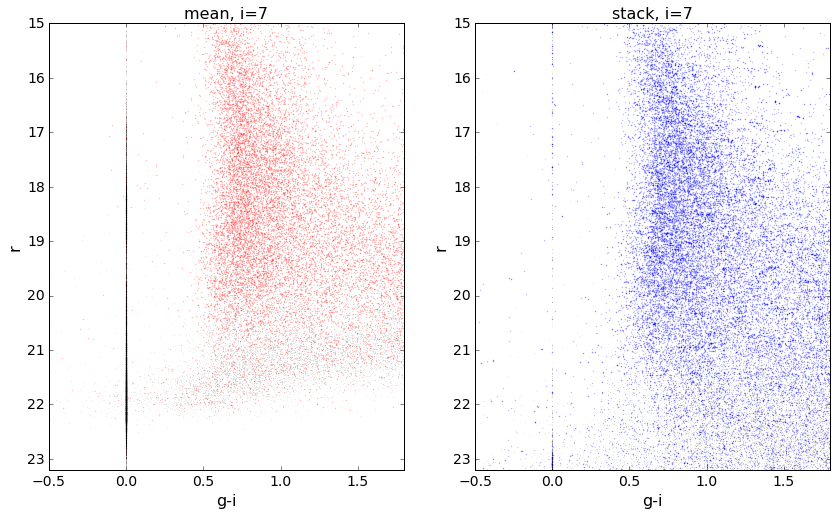

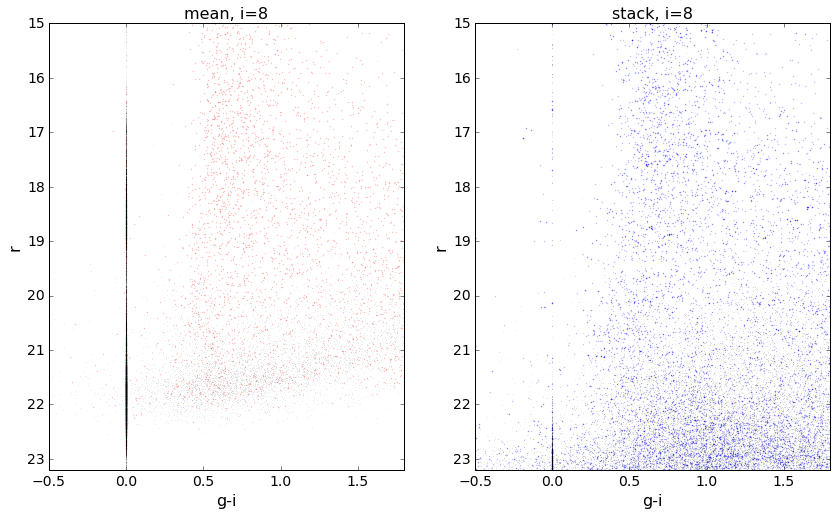

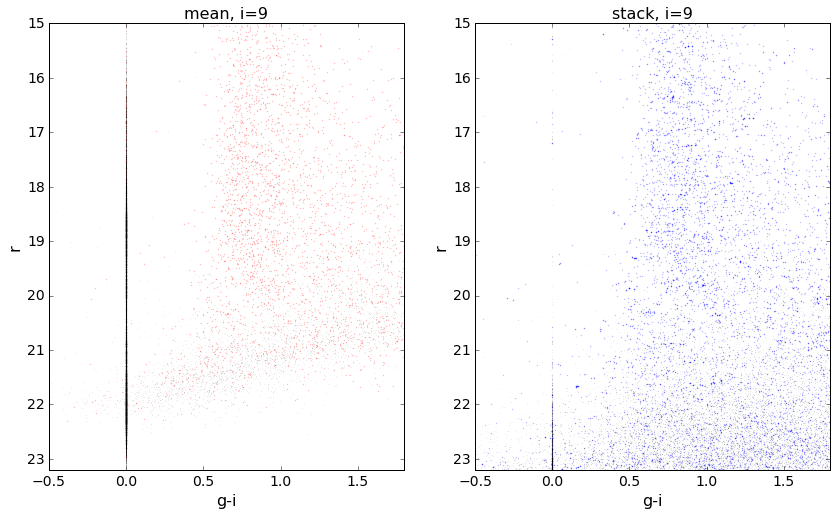

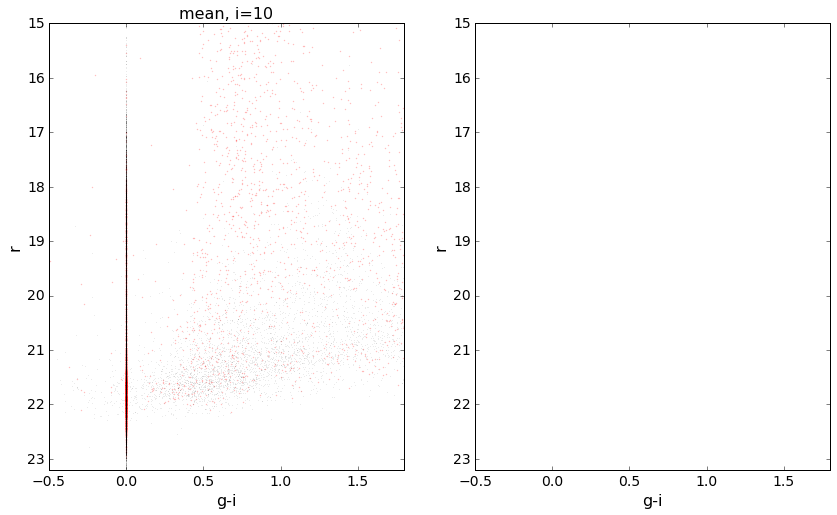

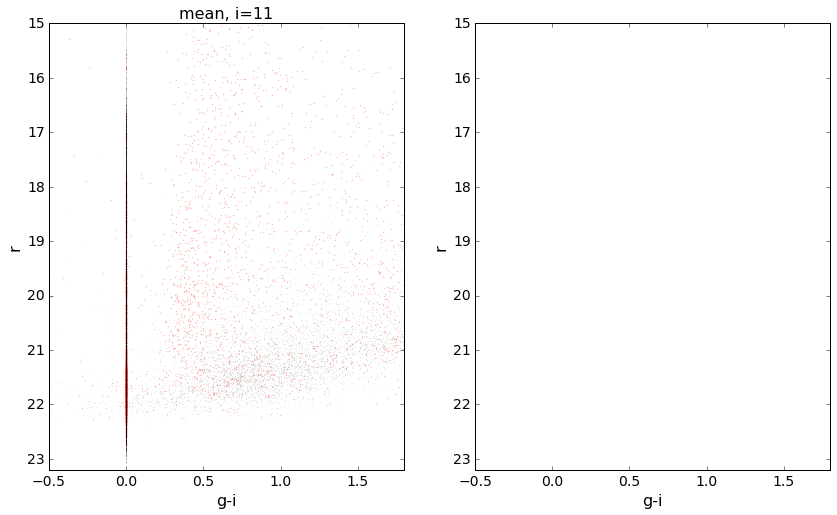

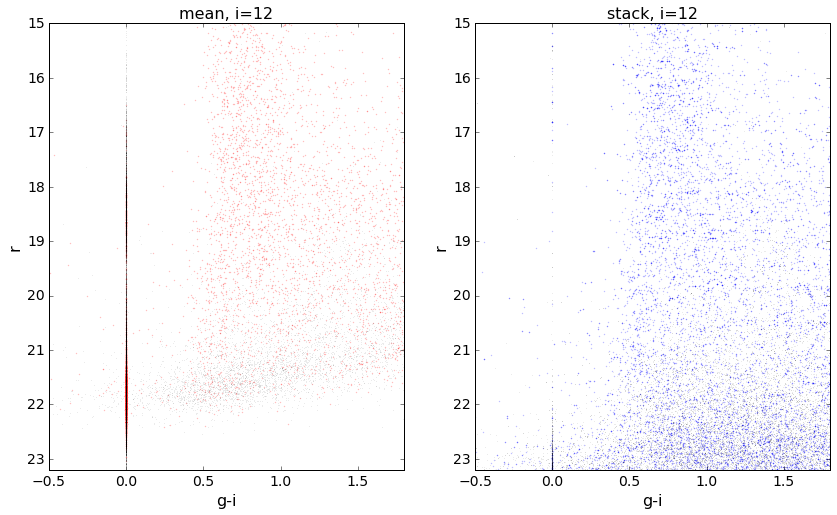

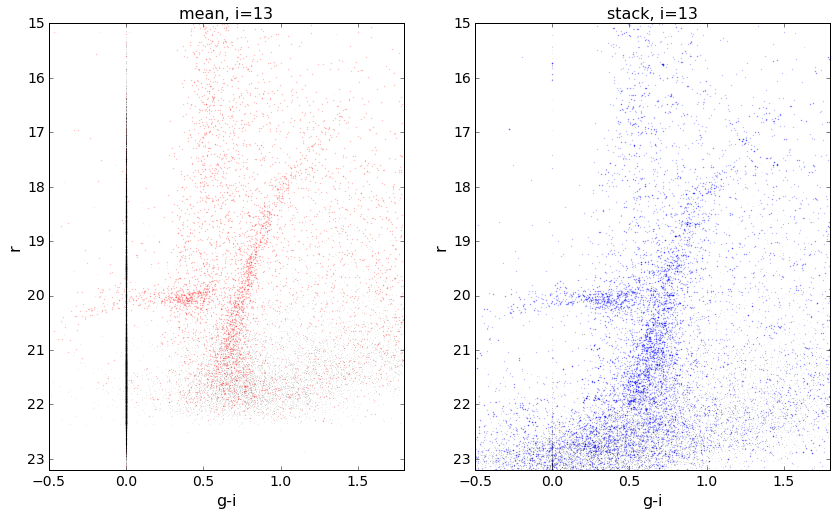

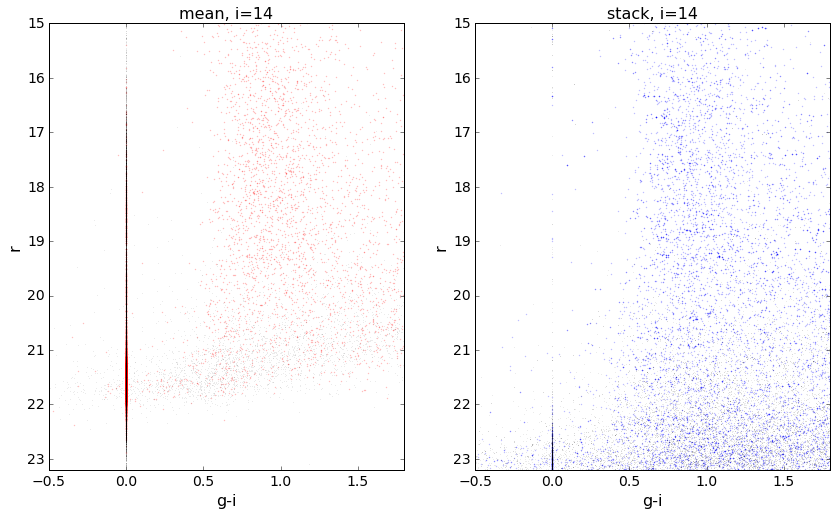

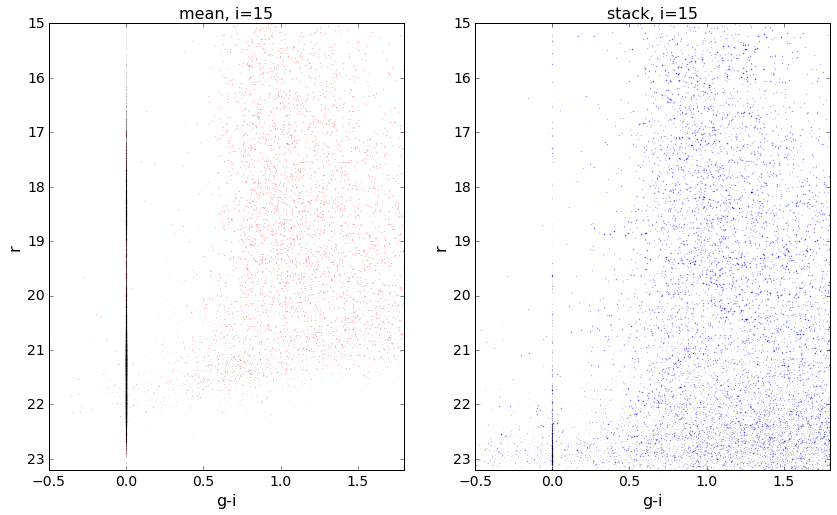

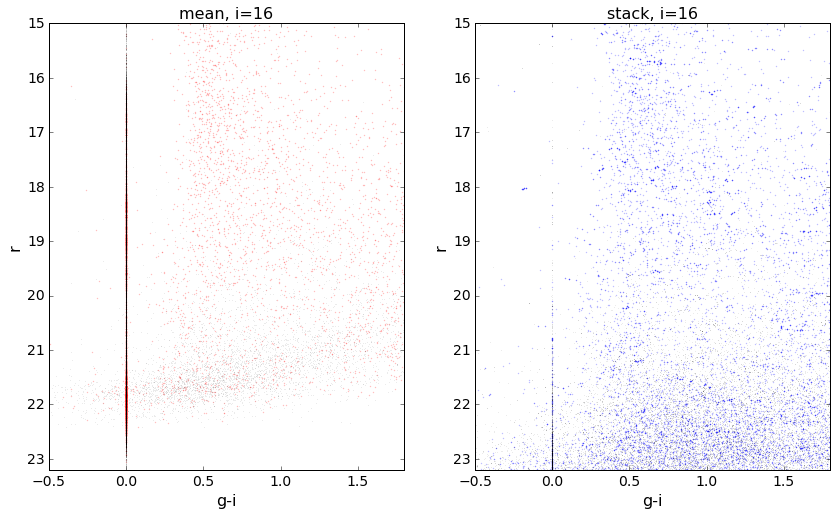

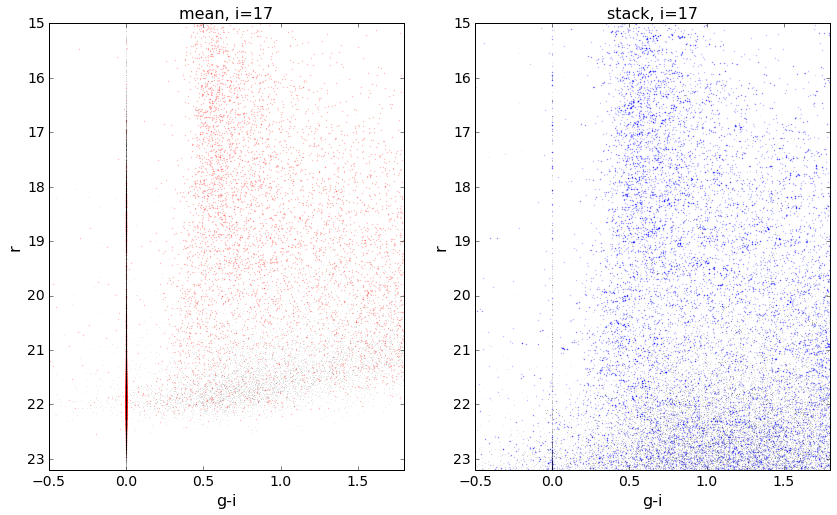

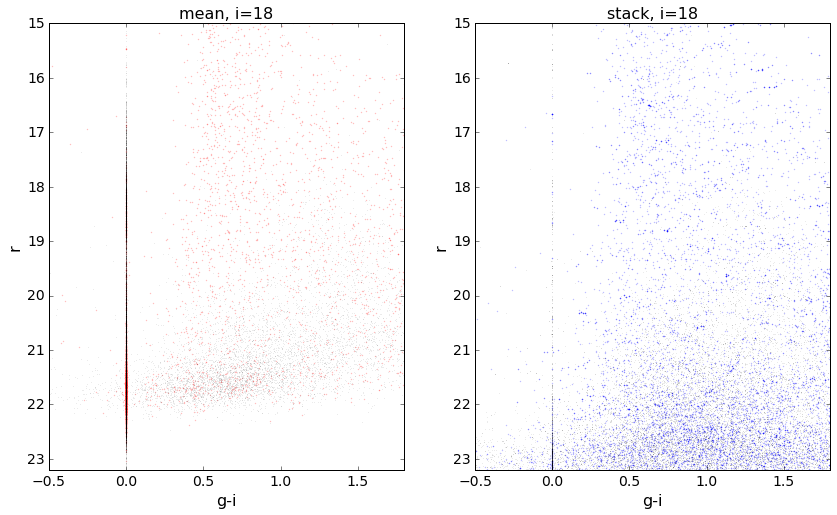

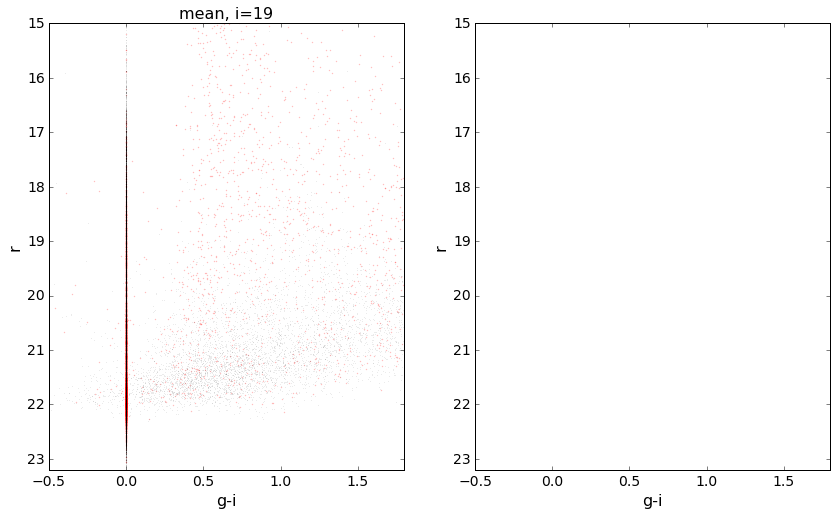

In [46]:
for i, nm in enumerate(randomized_order):
    mean_tab, stack_tab = meanstack_tabs[nm]
    #stack_tab = None  # hide *all* the stacks with this on to make it more blind
    
    plt.figure()
    
    if stack_tab is not None:
        gmi_stack = stack_tab['st_gPSFMag'] - stack_tab['st_iPSFMag']
        r_stack = stack_tab['st_rPSFMag']
        starmsk_stack = stack_tab['starprob'] >0.5

    gmi_mean = mean_tab['m_gMeanPSFMag'] - mean_tab['m_iMeanPSFMag']
    r_mean = mean_tab['m_rMeanPSFMag']
    starmsk_mean = mean_tab['starprob'] >0.5

    fig, axs = plt.subplots(1, 2)
    axs[0].scatter(gmi_mean[starmsk_mean], r_mean[starmsk_mean], alpha=.25, lw=0, s=2, c='r')
    axs[0].scatter(gmi_mean[~starmsk_mean], r_mean[~starmsk_mean], alpha=.1, lw=0, s=1, c='k')
    
    if stack_tab is not None:
        axs[1].scatter(gmi_stack[starmsk_stack], r_stack[starmsk_stack], alpha=.25, lw=0, s=2, c='b')
        axs[1].scatter(gmi_stack[~starmsk_stack], r_stack[~starmsk_stack], alpha=.1, lw=0, s=1, c='k')

    for ax in axs:
        ax.set_xlim(-.5, 1.8)
        ax.set_ylim(23.2, 15)

        ax.set_xlabel('g-i')
        ax.set_ylabel('r')

    axs[0].set_title('mean, i={}'.format(i))
    if stack_tab is not None:
        axs[1].set_title('stack, i={}'.format(i))
    
    
print('#Paste this in the cell below for final judgements *before* revealing the names:')
print('sat_present_idx = {}')
for i in range(len(randomized_order)):
    print("sat_present_idx[{}] = 'unknown' # 'yes', 'no', 'maybe'".format(i))
print('sat_present_idx')
print("""

sat_present = {}
for i, nm in  enumerate(randomized_order):
    print(nm,':', sat_present_idx[i])
    sat_present[nm] = sat_present_idx[i]
"""[1:-1])

In [17]:
#Paste this in the cell below for final judgements *before* revealing the names:
sat_present_idx = {}
sat_present_idx[0] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[1] = 'no' # 'yes', 'no', 'maybe'
sat_present_idx[2] = 'no' # 'yes', 'no', 'maybe'
sat_present_idx[3] = 'maybe' # 'yes', 'no', 'maybe'
sat_present_idx[4] = 'no' # 'yes', 'no', 'maybe'
sat_present_idx[5] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[6] = 'maybe' # 'yes', 'no', 'maybe'
sat_present_idx[7] = 'unknown' # 'yes', 'no', 'maybe'
sat_present_idx[8] = 'maybe' # 'yes', 'no', 'maybe'
sat_present_idx[9] = 'no' # 'yes', 'no', 'maybe'
sat_present_idx[10] = 'maybe' # 'yes', 'no', 'maybe'
sat_present_idx[11] = 'maybe' # 'yes', 'no', 'maybe'
sat_present_idx[12] = 'maybe' # 'yes', 'no', 'maybe'
sat_present_idx[13] = 'yes' # 'yes', 'no', 'maybe'
sat_present_idx[14] = 'no' # 'yes', 'no', 'maybe'
sat_present_idx[15] = 'no' # 'yes', 'no', 'maybe'
sat_present_idx[16] = 'maybe' # 'yes', 'no', 'maybe'
sat_present_idx[17] = 'maybe' # 'yes', 'no', 'maybe'
sat_present_idx[18] = 'no' # 'yes', 'no', 'maybe'
sat_present_idx[19] = 'no' # 'yes', 'no', 'maybe'
sat_present_idx

sat_present = {}
for i, nm in  enumerate(randomized_order):
    sat_present[nm] = sat_present_idx[i]
sat_present

{'aquarius': 'maybe',
 'draco': 'yes',
 'leoiv': 'maybe',
 'leot': 'maybe',
 'piscA': 'maybe',
 'piscB': 'no',
 'vdev_00': 'no',
 'vdev_01': 'maybe',
 'vdev_02': 'no',
 'vdev_03': 'no',
 'vdev_04': 'no',
 'vdev_05': 'unknown',
 'vdev_06': 'unknown',
 'vdev_07': 'no',
 'vdev_08': 'unknown',
 'vdev_09': 'maybe',
 'vdev_10': 'no',
 'vdev_11': 'maybe',
 'vdev_12': 'no',
 'vdev_13': 'maybe'}

test

# Look more closely at maybe's/yes's 

In [23]:
def exam_plot(nm, rad=10*u.arcmin, alphascale=1, sizescale=1, bgcolor=None, show_far=True, inject=None, title=None):
    mean_tab, stack_tab = meanstack_tabs[nm]

    if stack_tab is not None:
        gmi_stack = stack_tab['st_gPSFMag'] - stack_tab['st_iPSFMag']
        r_stack = stack_tab['st_rPSFMag']
        starprob_stack = stack_tab['starprob']
        starmsk_stack = starprob_stack >0.5
        if rad:
            ra0_stack = np.mean(stack_tab['st_raStack'])
            dec0_stack = np.mean(stack_tab['st_decStack'])
            near_stack = np.hypot((stack_tab['st_raStack']-ra0_stack)*np.cos(dec0_stack*u.deg), stack_tab['st_decStack']-dec0_stack)*u.deg < rad

    gmi_mean = mean_tab['m_gMeanPSFMag'] - mean_tab['m_iMeanPSFMag']
    r_mean = mean_tab['m_rMeanPSFMag']
    starprob_mean = mean_tab['starprob']
    starmsk_mean = starprob_mean >0.5
    if rad:
        ra0_mean = np.mean(mean_tab['o_raMean'])
        dec0_mean = np.mean(mean_tab['o_decMean'])
        near_mean = np.hypot((mean_tab['o_raMean']-ra0_mean)*np.cos(dec0_mean*u.deg), mean_tab['o_decMean']-dec0_mean)*u.deg < rad
    
    if inject:
        gmi_inject, r_inject = inject
        
        if stack_tab is not None:
            gmi_stack = np.concatenate((gmi_stack, gmi_inject))
            r_stack = np.concatenate((r_stack, r_inject))
            starprob_stack = np.concatenate((starprob_stack, [1]*len(r_inject)))
            starmsk_stack = np.concatenate((starmsk_stack, [True]*len(r_inject)))
            if rad:
                near_stack = np.concatenate((near_stack, [True]*len(r_inject)))
        
        gmi_mean = np.concatenate((gmi_mean, gmi_inject))
        r_mean = np.concatenate((r_mean, r_inject))
        starprob_mean = np.concatenate((starprob_mean, [1]*len(r_inject)))
        starmsk_mean = np.concatenate((starmsk_mean, [True]*len(r_inject)))
        if rad:
            near_mean = np.concatenate((near_mean, [True]*len(r_inject)))

    fig, axs = plt.subplots(2 if rad else 1, 2, figsize=(14,14 if rad else 7))

    axs.flat[0].scatter(gmi_mean[starmsk_mean], r_mean[starmsk_mean], alpha=.2*alphascale, lw=0, s=2*sizescale, c='r')
    axs.flat[0].scatter(gmi_mean[~starmsk_mean], r_mean[~starmsk_mean], alpha=.1, lw=0, s=1, c='k')
    
    if stack_tab is not None:
        axs.flat[1].scatter(gmi_stack[starmsk_stack], r_stack[starmsk_stack], alpha=.2*alphascale, lw=0, s=2*sizescale, c='b')
        axs.flat[1].scatter(gmi_stack[~starmsk_stack], r_stack[~starmsk_stack], alpha=.1, lw=0, s=1, c='k')

    if rad:
        sc = axs.flat[2].scatter(gmi_mean[near_mean], r_mean[near_mean], alpha=.5*alphascale, lw=0, s=1*sizescale, 
                                 c=1-starprob_mean[near_mean], vmin=0, vmax=1)
        plt.colorbar(sc, orientation='vertical', ax=axs.flat[2]).set_label('$P_{gal}$')
        if show_far:
            axs.flat[2].scatter(gmi_mean[~near_mean], r_mean[~near_mean], alpha=.1, lw=0, s=1, c='k')

        if stack_tab is not None:
            sc = axs.flat[3].scatter(gmi_stack[near_stack], r_stack[near_stack], alpha=.5*alphascale, lw=0, s=1*sizescale, 
                                     c=1-starmsk_stack[near_stack], vmin=0, vmax=1)
            plt.colorbar(sc, orientation='vertical', ax=axs.flat[3]).set_label('$P_{gal}$')
            if show_far:
                axs.flat[3].scatter(gmi_stack[~near_stack], r_stack[~near_stack], alpha=.1, lw=0, s=1, c='k')

    for ax in axs.flat:
        if bgcolor is not None:
            ax.set_axis_bgcolor(bgcolor)
        ax.set_xlim(-.5, 1.8)
        ax.set_ylim(23.2, 15)

        ax.set_xlabel('g-i')
        ax.set_ylabel('r')
    
    if title is None:
        title = nm
    axs.flat[0].set_title('mean, {}'.format(title))
    axs.flat[1].set_title('stack, {}'.format(title))

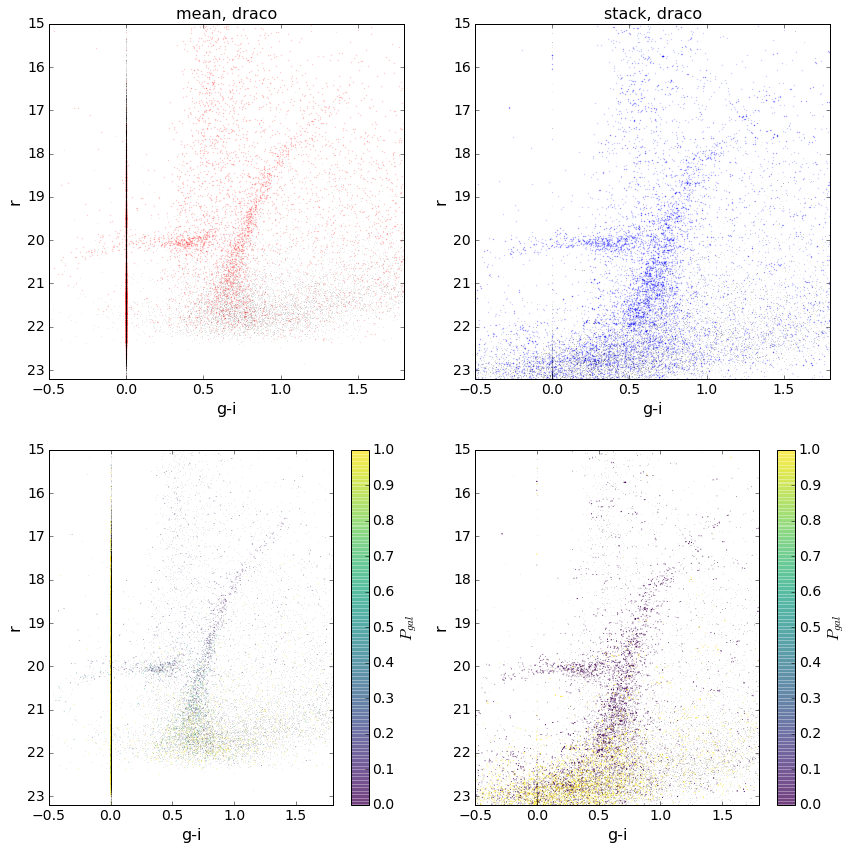

In [18]:
exam_plot('draco', 10*u.arcmin)

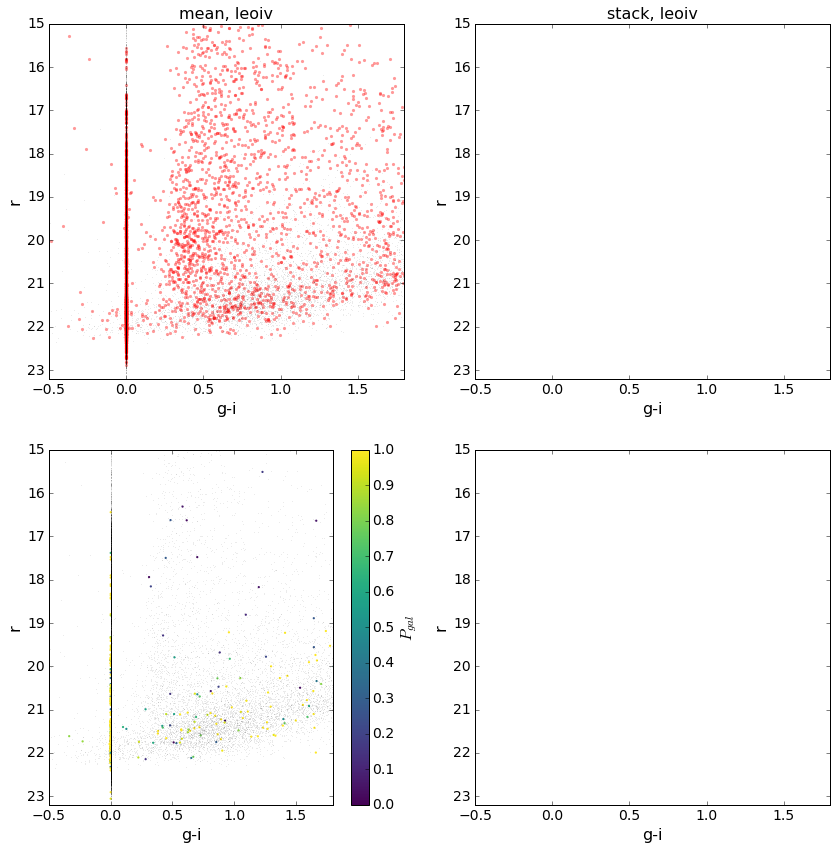

In [59]:
exam_plot('leoiv', 3.5*u.arcmin, sizescale=5, alphascale=2)

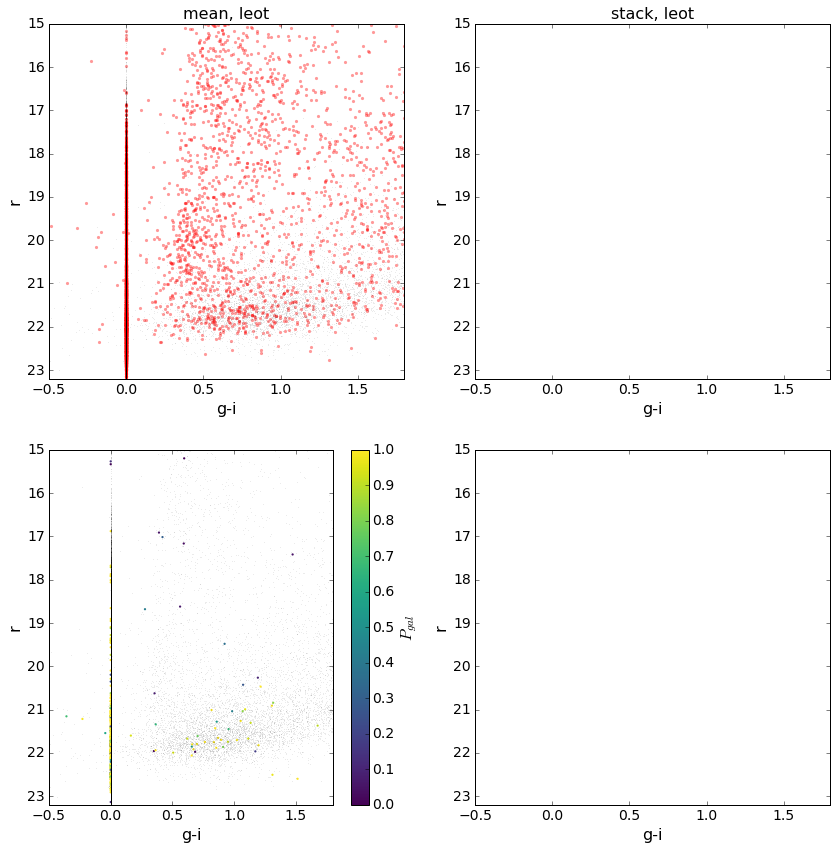

In [60]:
exam_plot('leot', 1.8*u.arcmin, sizescale=5, alphascale=2)

/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in greater


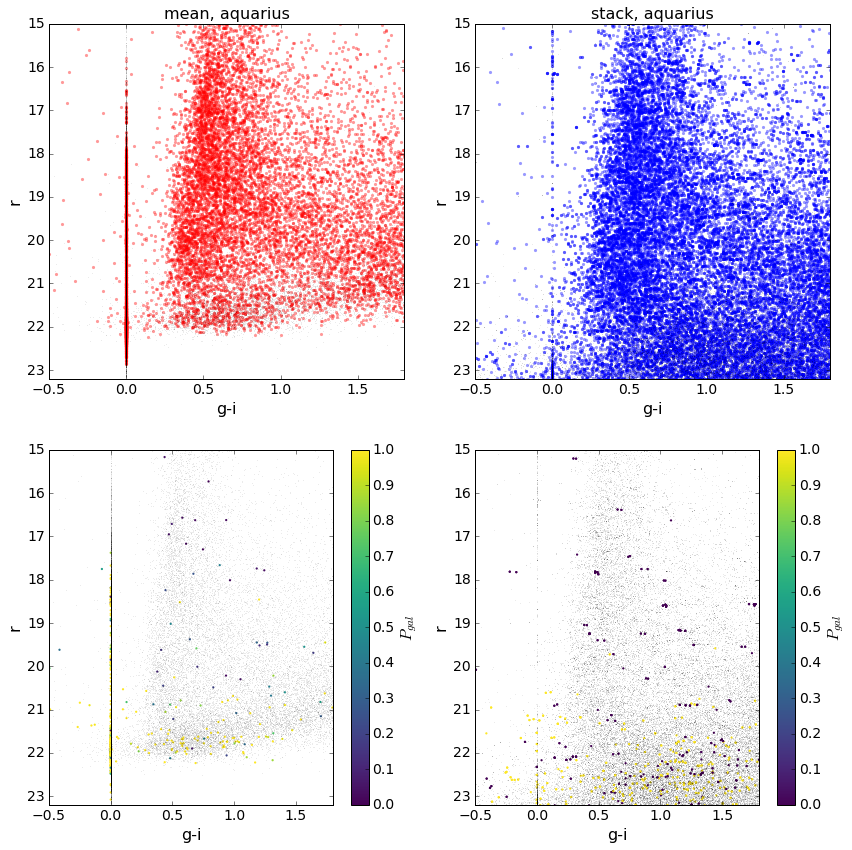

In [61]:
exam_plot('aquarius', 2*u.arcmin, sizescale=5, alphascale=2)

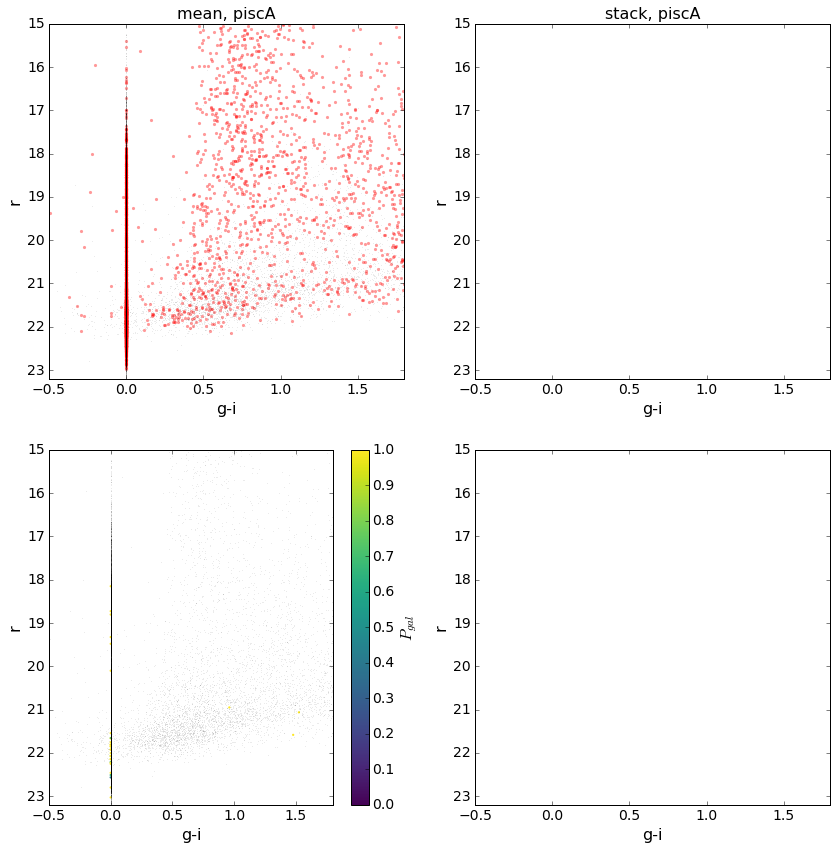

In [62]:
exam_plot('piscA', 1*u.arcmin, sizescale=5, alphascale=2)

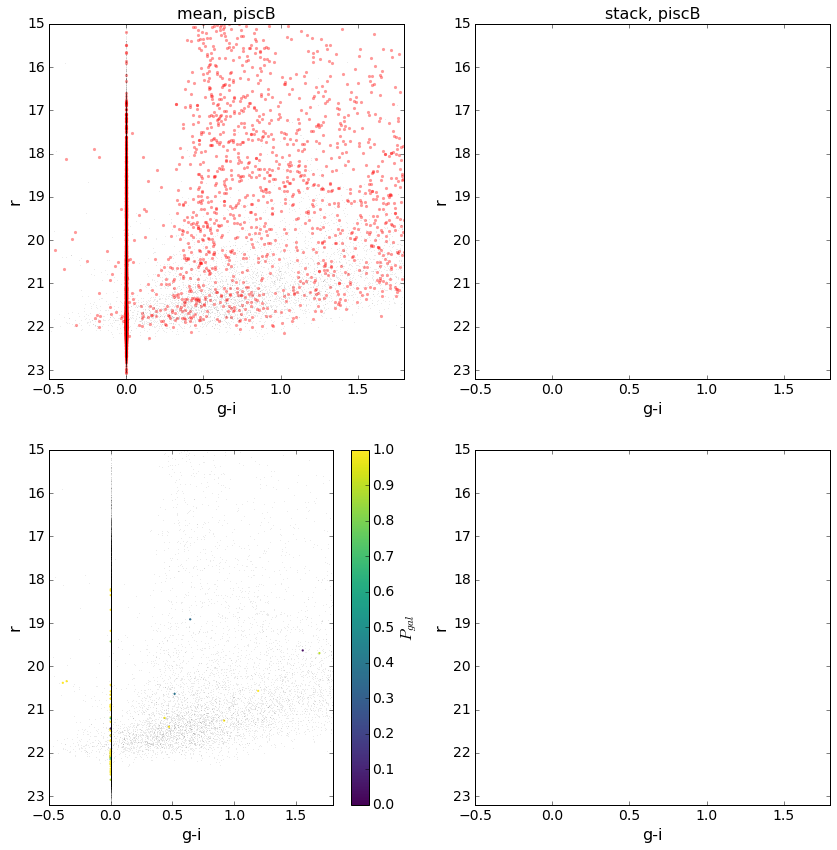

In [63]:
exam_plot('piscB', 1*u.arcmin, sizescale=5, alphascale=2)

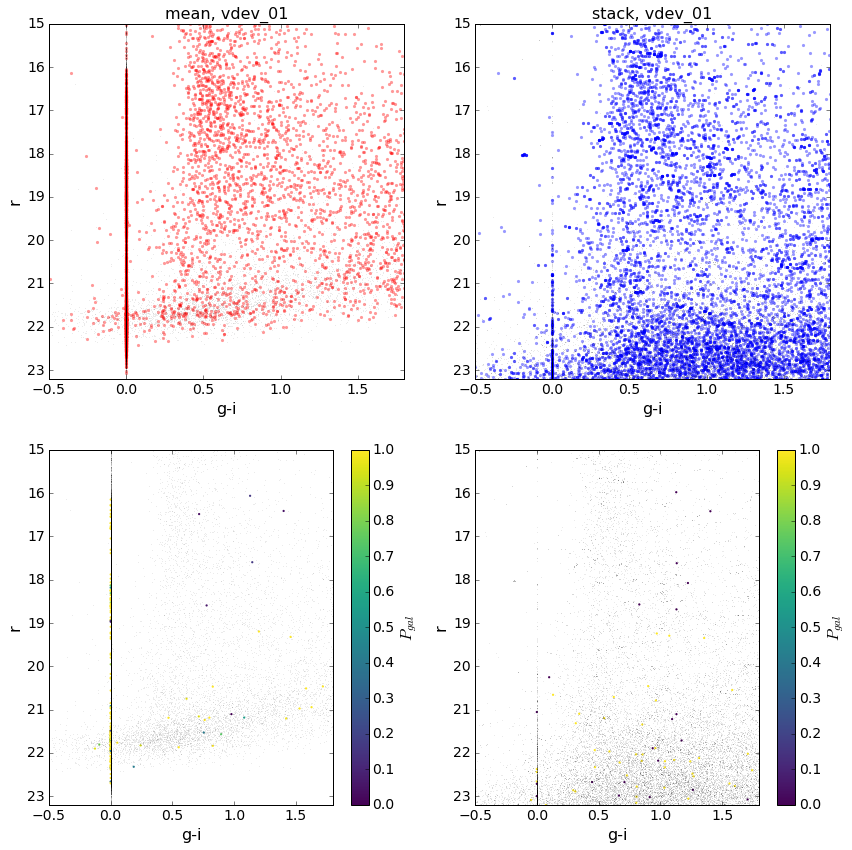

In [64]:
exam_plot('vdev_01', 3*u.arcmin, sizescale=5, alphascale=2)

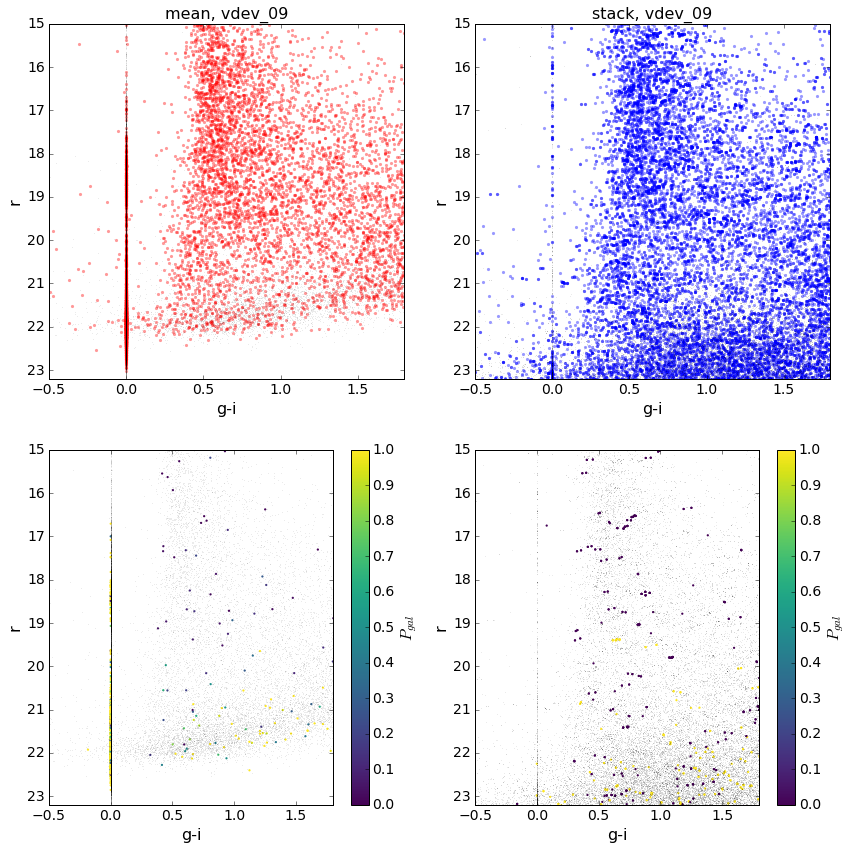

In [65]:
exam_plot('vdev_09', 3*u.arcmin, sizescale=5, alphascale=2)

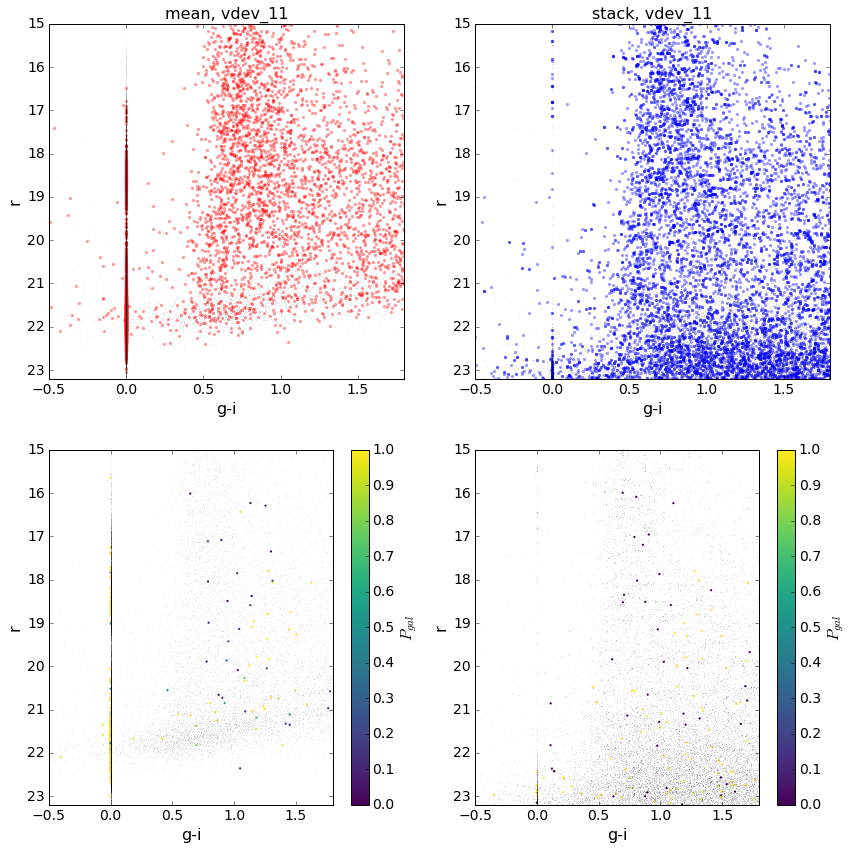

In [66]:
exam_plot('vdev_11', 3*u.arcmin, sizescale=5, alphascale=2)

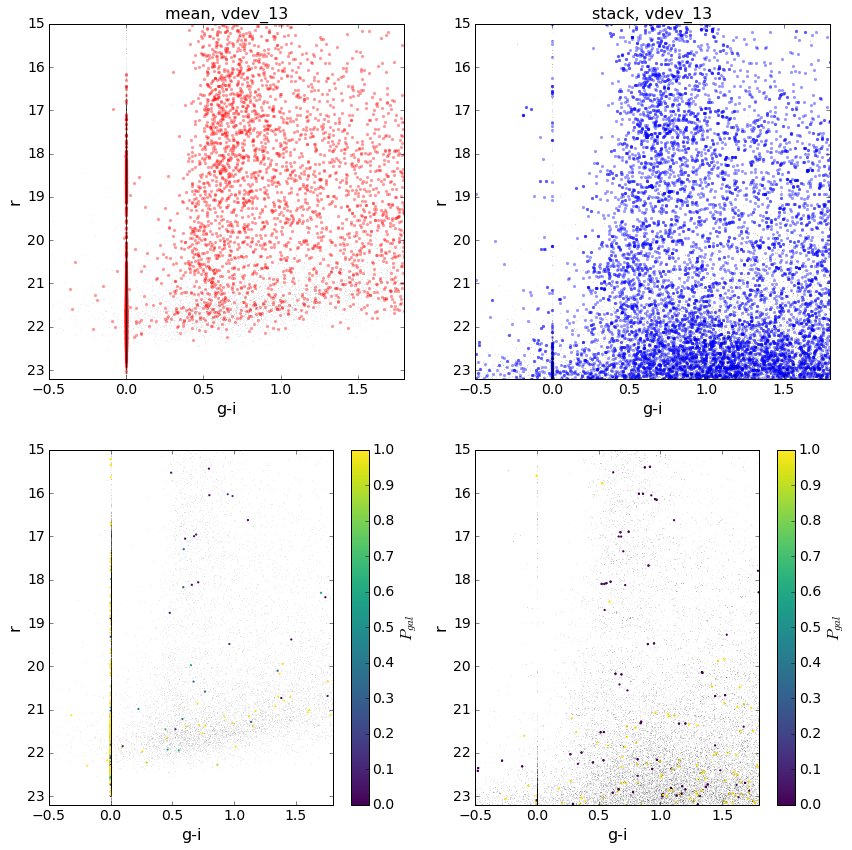

In [67]:
exam_plot('vdev_13', 3*u.arcmin, sizescale=5, alphascale=2)

# Injected signals

In [ ]:
#start with those that have *no* obvious signs of sats
nosig = [nm for nm, val in sat_present.items() if val=='no']

In [ ]:
def simulate_dwarf_stars(Mstar, distance, sc_for_extinction=None):
    if sc_for_extinction:
        raise NotImplementedError
    raise NotImplementedError
    return None
    return (gmi, r)

In [ ]:
Mstars = [1e3, 1e5, 1e7]*u.solMass
distances = [50, 300, 1000]*u.kpc

simulations = {}
for Mstar in Mstars:
    for dist in distances:
        simulations[(Mstar, dist)] = simulate_dwarf_stars(Mstar, dist)

In [ ]:
for (Mstar, dist), sim in simulations.items():
    nm = nosig[np.random.randint(len(nosig))]
    exam_plot(nm, rad=None, inject=sim, title='{}, {}, {}'.format(nm, Mstar, dist))

# Appendices

# S/G separation checks

In [ ]:
appdx_sample = randomized_order[:4]
if 'draco' not in appdx_sample:
    appdx_sample[0] = 'draco'
appdx_sample

In [ ]:
band = 'r'
nmax = 100000

## Ap 

In [ ]:
for i, nm in enumerate(appdx_sample):
    mean_tab, stack_tab = meanstack_tabs[nm]
    
    fig, axs = plt.subplots(1, 2)
    
    
    mean_sample = np.random.permutation(len(mean_tab))[:nmax]
    stack_sample = np.random.permutation(len(stack_tab))[:nmax]
    
    
    other = mean_tab['m_{}MeanApMag'.format(band)][mean_sample]
    psf = mean_tab['m_{}MeanPSFMag'.format(band)][mean_sample]
    sc = axs[0].scatter(psf, psf-other, alpha=.2, lw=0, s=2, c=mean_tab['starprob'][mean_sample])

    other = stack_tab['st_{}ApMag'.format(band)][stack_sample]
    psf = stack_tab['st_{}PSFMag'.format(band)][stack_sample]
    sc = axs[1].scatter(psf, psf-other, alpha=.2, lw=0, s=2, c=stack_tab['starprob'][stack_sample])
    
    axs[0].set_title('mean, {}'.format(nm))
    axs[1].set_title('stack, {}'.format(nm))
    
    for ax in axs:
        ax.set_xlabel('PSF')
        ax.set_ylabel('PSF - Ap')
        ax.set_ylim(-1.0, 1.0)
        ax.set_xlim(15, 23)
        
    plt.colorbar(sc).set_label(r'$P_{\rm star}$')

## Kron

In [ ]:
for i, nm in enumerate(appdx_sample):
    mean_tab, stack_tab = meanstack_tabs[nm]
    
    fig, axs = plt.subplots(1, 2)
    
    band = 'r'
    nmax = 300000
    mean_sample = np.random.permutation(len(mean_tab))[:nmax]
    stack_sample = np.random.permutation(len(stack_tab))[:nmax]
    
    
    other = mean_tab['m_{}MeanKronMag'.format(band)][mean_sample]
    psf = mean_tab['m_{}MeanPSFMag'.format(band)][mean_sample]
    sc = axs[0].scatter(psf, psf-other, alpha=.2, lw=0, s=2, c=mean_tab['starprob'][mean_sample])

    other = stack_tab['st_{}KronMag'.format(band)][stack_sample]
    psf = stack_tab['st_{}PSFMag'.format(band)][stack_sample]
    sc = axs[1].scatter(psf, psf-other, alpha=.2, lw=0, s=2, c=stack_tab['starprob'][stack_sample])
    
    axs[0].set_title('mean, i={}'.format(i))
    axs[1].set_title('stack, i={}'.format(i))
    
    for ax in axs:
        ax.set_xlabel('PSF')
        ax.set_ylabel('PSF - Kron')
        ax.set_ylim(-1.0, 1.0)
        ax.set_xlim(15, 23)
        
    plt.colorbar(sc).set_label(r'$P_{\rm star}$')

# In different bands 

# Kron vs PSF

In [ ]:
for i, nm in enumerate(appdx_sample):
    mean_tab, stack_tab = meanstack_tabs[nm]
    
    fig, axs = plt.subplots(1, 2)
    for band, color in zip('gri', 'grm'):
        other = mean_tab['m_{}MeanKronMag'.format(band)]
        psf = mean_tab['m_{}MeanPSFMag'.format(band)]
        axs[0].scatter(psf, psf-other, alpha=.05, lw=0, s=2, c=color)
        
        other = stack_tab['st_{}KronMag'.format(band)]
        psf = stack_tab['st_{}PSFMag'.format(band)]
        axs[1].scatter(psf, psf-other, alpha=.05, lw=0, s=2, c=color)
    
    axs[0].set_title('mean, {}'.format(nm))
    axs[1].set_title('stack, {}'.format(nm))
    
    for ax in axs:
        ax.set_xlabel('PSF')
        ax.set_ylabel('PSF - Kron')
        ax.set_ylim(-1.0, 1.0)
        ax.set_xlim(15, 23)
    

# S/G Aperture vs PSF

In [ ]:
for i, nm in enumerate(appdx_sample):
    mean_tab, stack_tab = meanstack_tabs[nm]
    
    fig, axs = plt.subplots(1, 2)
    for band, color in zip('gri', 'grm'):
        other = mean_tab['m_{}MeanApMag'.format(band)]
        psf = mean_tab['m_{}MeanPSFMag'.format(band)]
        axs[0].scatter(psf, psf-other, alpha=.05, lw=0, s=2, c=color)
        
        other = stack_tab['st_{}ApMag'.format(band)]
        psf = stack_tab['st_{}PSFMag'.format(band)]
        axs[1].scatter(psf, psf-other, alpha=.05, lw=0, s=2, c=color)
    
    axs[0].set_title('mean, {}'.format(nm))
    axs[1].set_title('stack, {}'.format(nm))
    
    for ax in axs:
        ax.set_xlabel('PSF')
        ax.set_ylabel('PSF - Ap')
        ax.set_ylim(-1.5, 1.5)
        ax.set_xlim(15, 23)
    

# Uncertainties 

In [ ]:
for i, nm in enumerate(appdx_sample):
    mean_tab, stack_tab = meanstack_tabs[nm]
    
    fig, axs = plt.subplots(1, 2)
    for band, color in zip('gri', 'grm'):
        psf = mean_tab['m_{}MeanPSFMag'.format(band)]
        psf_err = mean_tab['m_{}MeanPSFMagErr'.format(band)]
        axs[0].scatter(psf, psf_err, alpha=.05, lw=0, s=2, c=color)
        
        psf = stack_tab['st_{}PSFMag'.format(band)]
        psf_err = stack_tab['st_{}PSFMagErr'.format(band)]
        axs[1].scatter(psf, psf_err, alpha=.05, lw=0, s=2, c=color)
    
    axs[0].set_title('mean, {}'.format(nm))
    axs[1].set_title('stack, {}'.format(nm))
    
    for ax in axs:
        ax.set_xlabel('PSF')
        ax.set_ylabel('PSF_err')
        ax.set_ylim(0, .5)
        ax.set_xlim(15, 23)
    

In [ ]:
for i, nm in enumerate(appdx_sample):
    mean_tab, stack_tab = meanstack_tabs[nm]
    
    fig, axs = plt.subplots(1, 2)
    for band, color in zip('gri', 'grm'):
        psf = mean_tab['m_{}MeanKronMag'.format(band)]
        psf_err = mean_tab['m_{}MeanKronMagErr'.format(band)]
        axs[0].scatter(psf, psf_err, alpha=.05, lw=0, s=2, c=color)
        
        psf = stack_tab['st_{}KronMag'.format(band)]
        psf_err = stack_tab['st_{}KronMagErr'.format(band)]
        axs[1].scatter(psf, psf_err, alpha=.05, lw=0, s=2, c=color)
    
    axs[0].set_title('mean, {}'.format(nm))
    axs[1].set_title('stack, {}'.format(nm))
    
    for ax in axs:
        ax.set_xlabel('Kron')
        ax.set_ylabel('Kron_err')
        ax.set_ylim(0, .5)
        ax.set_xlim(15, 23)
    

# Informational about the vdev candidates 

In [16]:
vdev_objs = Table.read('/Users/erik/Dropbox/TP16/check_objs_radec.txt', format='ascii', 
                       delimiter=r'\s', names=['name', 'ra', 'dec'])

sc = SkyCoord(vdev_objs['ra'], vdev_objs['dec'], unit=u.deg, frame='icrs')

vdev_objs['ICRS'] = sc
vdev_objs['Galactic'] = sc.galactic
del vdev_objs['ra', 'dec']

vdev_objs

<Table length=19>
  name          ICRS                      Galactic               
              deg,deg                     deg,deg                
  str8         object                      object                
-------- ----------------- --------------------------------------
 vdev_00       17.63,25.05  128.39012409239027,-37.61943031858914
 vdev_01         30.2,29.9  140.4018804316566,-30.607872235174995
 vdev_02       41.23,30.16 150.28928666178555,-26.614787040522213
 vdev_03       47.85,26.76  157.82078250471454,-26.46959470817102
 vdev_04       52.77,21.85 165.16997140700022,-27.639980126356587
 vdev_05       86.02,30.81    178.22775422851524,0.69421501212227
 vdev_06       90.73,32.05   179.19176781701833,4.787973473891381
 vdev_07       211.49,6.08    346.3770438299968,62.48672082530977
 vdev_08      328.94,36.58  87.88577039367023,-14.066987417174808
 vdev_09       340.87,29.6  92.23476428388437,-25.537353308782407
 vdev_10       345.8,23.25  92.94773226117947,-33.243971494643375
 vdev_11      347.84,27.95  97.40004791227769,-29.913069222825673
 vdev_12      350.12,24.41   97.81235846092265,-33.98657357755398
 vdev_13      350.22,24.01   97.71198797528363,-34.38835073687247
    LeoT   143.722,17.0514   214.8521553920141,43.660500018643326
Aquarius 311.716,-12.84792  34.049313049971374,-31.34331195178233
 PiscesA   3.69167,10.8131  108.52321015667646,-51.02984145108374
 PiscesB   19.7987,11.1217   133.82833566155227,-51.1618525309894
   LeoIV  173.2375,-0.5333    265.4413098032926,56.51443348110625

<Table length=3>
  name      ICRS                    Galactic              
          deg,deg                   deg,deg               
  str8     object                    object               
------- ------------ -------------------------------------
vdev_05  86.02,30.81   178.22775422851524,0.69421501212227
vdev_06  90.73,32.05  179.19176781701833,4.787973473891381
vdev_08 328.94,36.58 87.88577039367023,-14.066987417174808

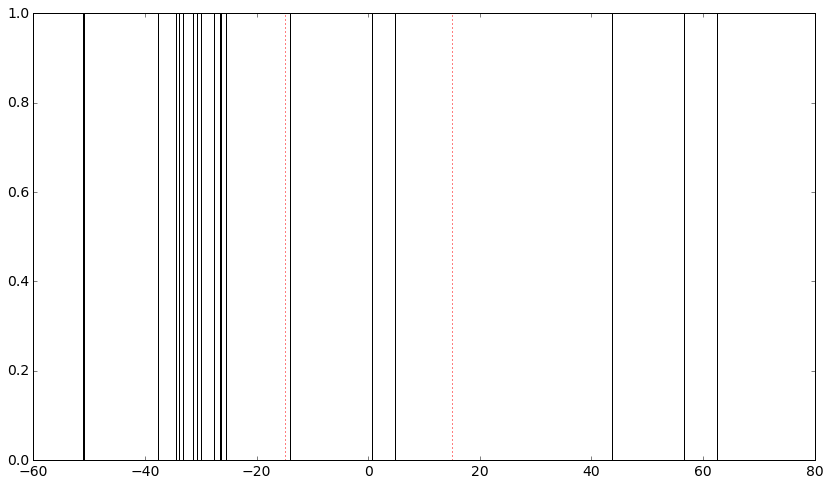

In [26]:
blims = [-15, 15]
bs = vdev_objs['Galactic'].b.deg 

plt.vlines(vdev_objs['Galactic'].b.deg, 0, 1)
plt.axvline(blims[0], c='r', ls=':')
plt.axvline(blims[1], c='r', ls=':')

vdev_objs[(blims[0] < bs)&(bs < blims[1])]

# 3.1 fields 

In [50]:
pv31_fns = glob('/Users/erik/Dropbox/TP16/*db2*')
rex = r'.*/(.*)_(st|mn)_.*'

nms = []
for fn in pv31_fns:
    nms.append(re.match(rex, fn).group(1))
pv31_tabs = {}
for nm in np.unique(nms):
    stnm = '/Users/erik/Dropbox/TP16/{}_st_db2_jegpeek.fit'.format(nm)
    mnnm = '/Users/erik/Dropbox/TP16/{}_mn_db2_jegpeek.fit'.format(nm)
    if os.path.exists(stnm):
        sttab = mean_tab = Table.read(stnm)
    else:
        sttab = None
    if os.path.exists(mnnm):
        mntab = mean_tab = Table.read(mnnm)
    else:
        mntab = None
    pv31_tabs[nm] = mntab, sttab
    
pv31_tabs.keys()

dict_keys(['LeoT', 'draco', 'vdev_05'])

In [54]:
for mean_tab, stack_tab in pv31_tabs.values():
    if mean_tab is not None:
        mean_tab['starprob'] = stargalprob(mean_tab['m_rMeanKronMag'], mean_tab['m_rMeanKronMagErr'],
                                       mean_tab['m_rMeanApMag'], mean_tab['m_rMeanApMagErr'],
                                       mean_tab['m_rMeanPSFMag'], mean_tab['m_rMeanPSFMagErr'], width=.1)
    if stack_tab is not None:
        stack_tab['starprob'] = stargalprob(stack_tab['st_rKronMag'], stack_tab['st_rKronMagErr'],
                                            stack_tab['st_rApMag'], stack_tab['st_rApMagErr'],
                                            stack_tab['st_rPSFMag'], stack_tab['st_rPSFMagErr'], width=.3)

/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in true_divide
/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1665: RuntimeWarning: invalid value encountered in greater
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1665: RuntimeWarning: invalid value encountered in less
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1666: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide
/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/ipykernel/__main__

/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in greater
/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in greater


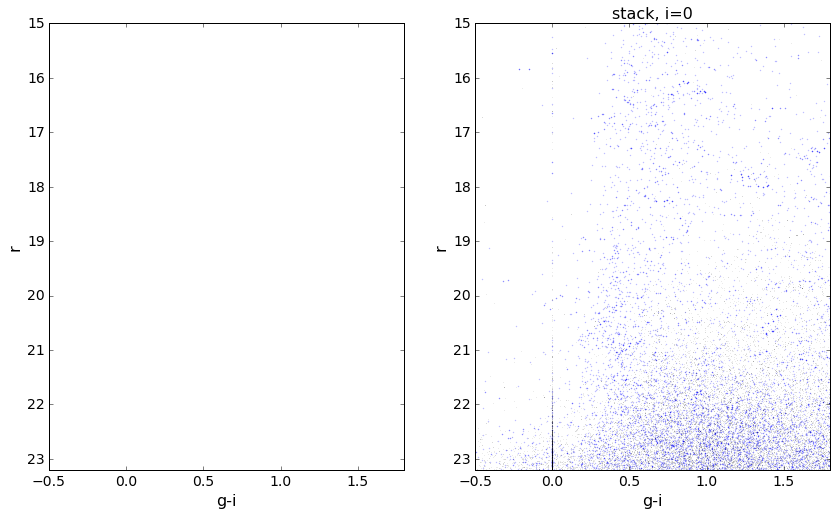

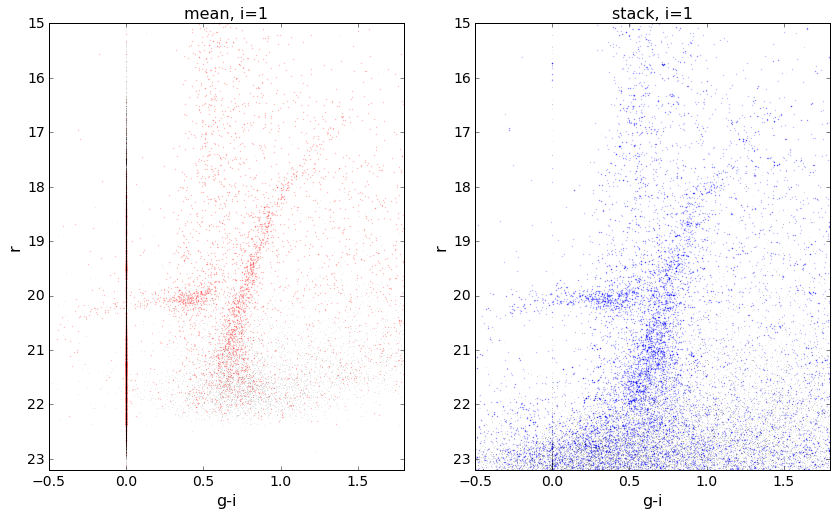

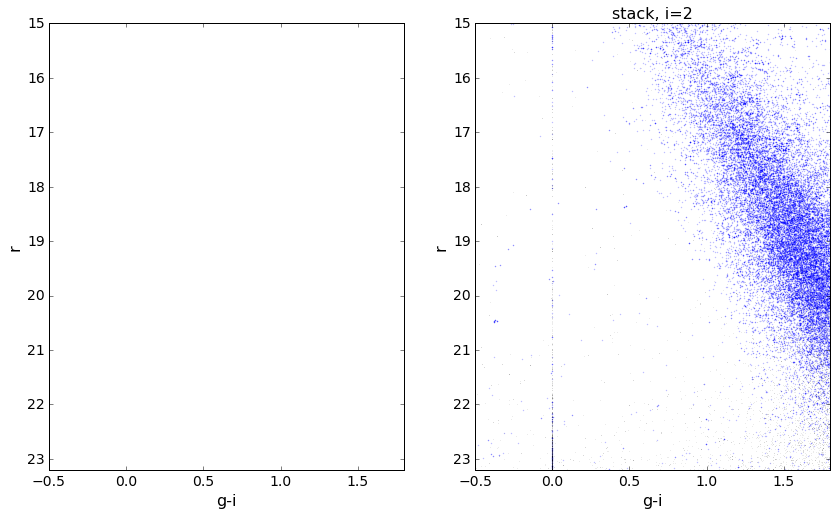

In [58]:
for i, nm in enumerate(pv31_tabs):
    mean_tab, stack_tab = pv31_tabs[nm]
    #stack_tab = None  # hide *all* the stacks with this on to make it more blind
    
    plt.figure()
    
    if stack_tab is not None:
        gmi_stack = stack_tab['st_gPSFMag'] - stack_tab['st_iPSFMag']
        r_stack = stack_tab['st_rPSFMag']
        starmsk_stack = stack_tab['starprob'] >0.5

    if mean_tab is not None:
        gmi_mean = mean_tab['m_gMeanPSFMag'] - mean_tab['m_iMeanPSFMag']
        r_mean = mean_tab['m_rMeanPSFMag']
        starmsk_mean = mean_tab['starprob'] >0.5

    fig, axs = plt.subplots(1, 2)
    if mean_tab is not None:
        axs[0].scatter(gmi_mean[starmsk_mean], r_mean[starmsk_mean], alpha=.25, lw=0, s=2, c='r')
        axs[0].scatter(gmi_mean[~starmsk_mean], r_mean[~starmsk_mean], alpha=.1, lw=0, s=1, c='k')
    
    if stack_tab is not None:
        axs[1].scatter(gmi_stack[starmsk_stack], r_stack[starmsk_stack], alpha=.25, lw=0, s=2, c='b')
        axs[1].scatter(gmi_stack[~starmsk_stack], r_stack[~starmsk_stack], alpha=.1, lw=0, s=1, c='k')

    for ax in axs:
        ax.set_xlim(-.5, 1.8)
        ax.set_ylim(23.2, 15)

        ax.set_xlabel('g-i')
        ax.set_ylabel('r')

    if mean_tab is not None:
        axs[0].set_title('mean, i={}'.format(i))
    if stack_tab is not None:
        axs[1].set_title('stack, i={}'.format(i))
    

### Try comparing aperture and PSF mags

/Users/erik/miniconda3/envs/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in greater


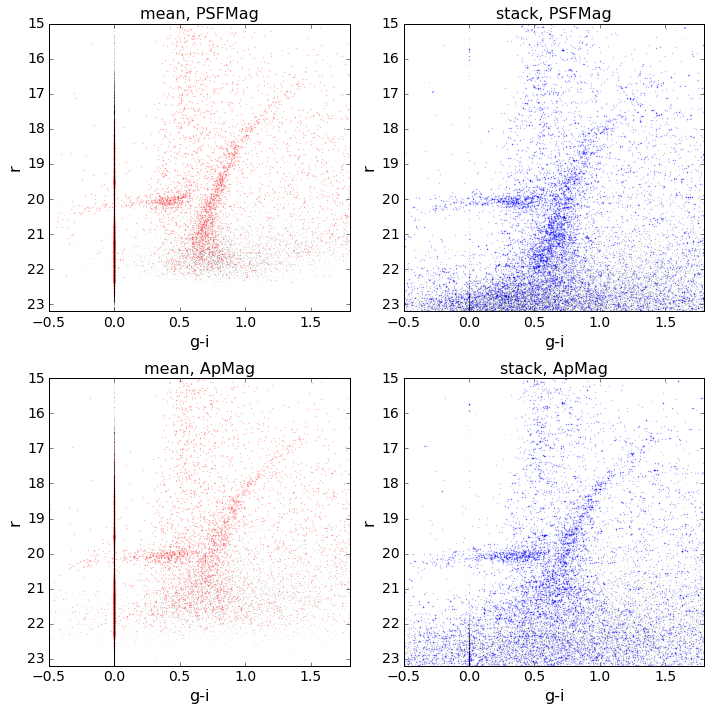

In [68]:
for i, nm in enumerate(pv31_tabs):
    mean_tab, stack_tab = pv31_tabs[nm]
    
    if mean_tab is None or stack_tab is None:
        continue
    
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    
    for imag, mag_type in enumerate(('PSF', 'Ap')):
        mag_name = mag_type + 'Mag'
    
        if stack_tab is not None:
            gmi_stack = stack_tab['st_g' + mag_name] - stack_tab['st_i' + mag_name]
            r_stack = stack_tab['st_r' + mag_name]
            starmsk_stack = stack_tab['starprob'] >0.5

        if mean_tab is not None:
            gmi_mean = mean_tab['m_gMean' + mag_name] - mean_tab['m_iMean' + mag_name]
            r_mean = mean_tab['m_rMean' + mag_name]
            starmsk_mean = mean_tab['starprob'] >0.5

        
        if mean_tab is not None:
            axs[imag,0].scatter(gmi_mean[starmsk_mean], r_mean[starmsk_mean], alpha=.25, lw=0, s=2, c='r')
            axs[imag,0].scatter(gmi_mean[~starmsk_mean], r_mean[~starmsk_mean], alpha=.1, lw=0, s=1, c='k')

        if stack_tab is not None:
            axs[imag,1].scatter(gmi_stack[starmsk_stack], r_stack[starmsk_stack], alpha=.25, lw=0, s=2, c='b')
            axs[imag,1].scatter(gmi_stack[~starmsk_stack], r_stack[~starmsk_stack], alpha=.1, lw=0, s=1, c='k')
            
        axs[imag, 0].set_title('mean, ' + mag_name)
        axs[imag, 1].set_title('stack, ' + mag_name)

    for ax in axs.ravel():
        ax.set_xlim(-.5, 1.8)
        ax.set_ylim(23.2, 15)

        ax.set_xlabel('g-i')
        ax.set_ylabel('r')
plt.tight_layout()

    